In [99]:
# Importing th necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from  sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import joblib

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [6]:
df = df.drop('CustomerID',axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
trf1 = ColumnTransformer([
    ('drop','drop',[0]),
    ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[1])
],remainder='passthrough')

In [26]:
a = trf1.fit_transform(df)
# a

In [27]:
trf2 = PCA(n_components=2)

In [28]:
b = trf2.fit_transform(a)


In [30]:
trf2.explained_variance_ratio_

array([0.50945741, 0.48985009])

In [31]:
KMeans()

KMeans()

In [32]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(b)
    wcss.append(km.inertia_)

In [33]:
wcss

[269985.0833108732,
 181366.40041581544,
 106349.07734263918,
 73680.60664480725,
 44448.53158539499,
 37265.9527039617,
 30259.667519684648,
 25095.881417573895,
 21830.032472507017,
 20736.638682814486]

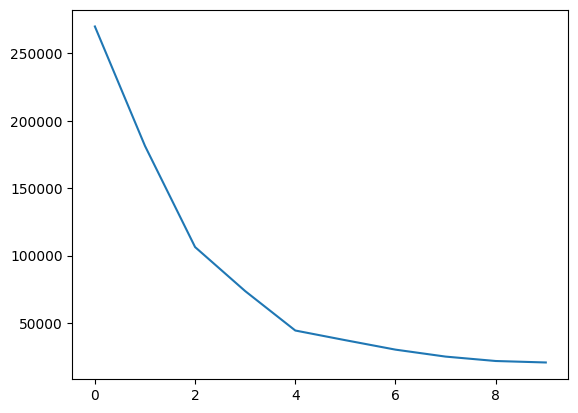

In [34]:
plt.plot(wcss)

In [35]:
# either 2 or 4

### Testing Phase

In [36]:
km = KMeans(n_clusters=4,random_state=0)

In [37]:
y1 = km.fit_predict(b)

In [38]:
y1

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [39]:
km1 = KMeans(n_clusters=4,random_state=0)

In [40]:
y = km1.fit_predict(b)

In [41]:
y

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [42]:
df = pd.DataFrame(b)

In [43]:
df[2]=y1

In [44]:
df1 = df[df[2]==0]

In [45]:
df2 = df[df[2]==1]

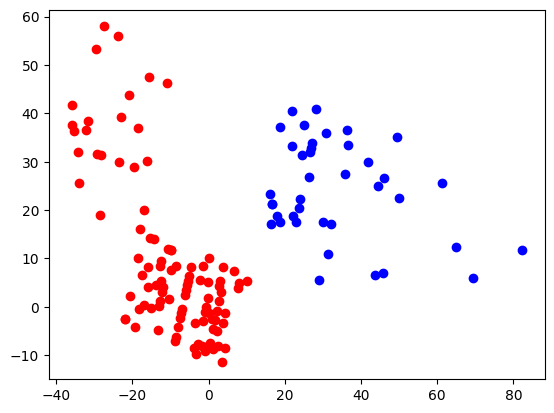

In [46]:
plt.scatter(df1[0],df1[1],c='blue')
plt.scatter(df2[0],df2[1],c='red')
plt.show()

In [65]:
dfa = pd.DataFrame(b)

In [67]:
dfa[2] = y

In [70]:
dfa[2].unique()

array([1, 2, 0, 3], dtype=int32)

In [72]:
dfa1 = dfa[dfa[2]==0]
dfa2 = dfa[dfa[2]==1]
dfa3 = dfa[dfa[2]==2]
dfa4 = dfa[dfa[2]==3]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


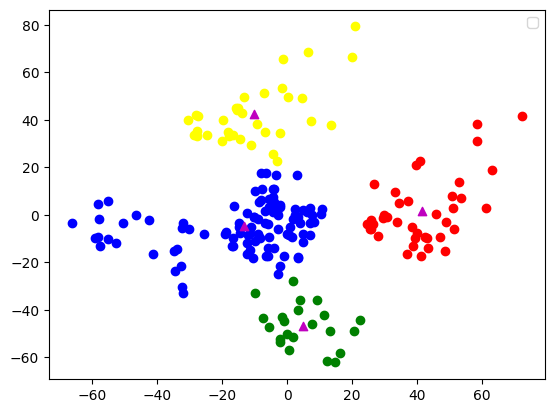

In [110]:
plt.scatter(dfa1[0],dfa1[1],c='red')
plt.scatter(dfa2[0],dfa2[1],c='blue')
plt.scatter(dfa3[0],dfa3[1],c='green')
plt.scatter(dfa4[0],dfa4[1],c='yellow')
plt.scatter(x,y,marker='^',c='m')
plt.legend()
plt.show()

### Third stage

In [ ]:
KMeans()

In [95]:
trf3 = KMeans(n_clusters=4)

In [96]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [97]:
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop', [0]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1])])),
                ('trf2', PCA(n_components=2)), ('trf3', KMeans(n_clusters=4))])

In [98]:
pipe.fit_predict(df)

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [101]:
pipe.predict([[7,'Female',35,18,6]])

/home/rahul/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [105]:
x = trf3.cluster_centers_[:,0]
y = trf3.cluster_centers_[:,1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


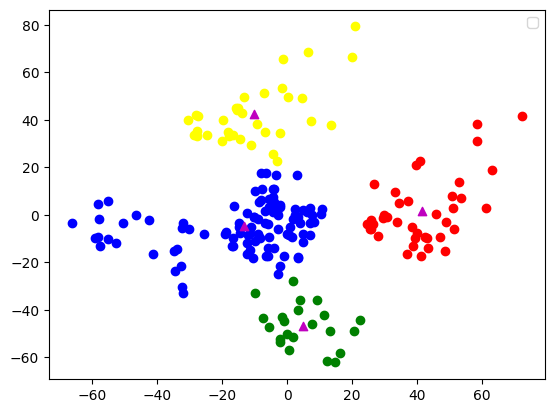

In [111]:
plt.scatter(dfa1[0],dfa1[1],c='red')
plt.scatter(dfa2[0],dfa2[1],c='blue')
plt.scatter(dfa3[0],dfa3[1],c='green')
plt.scatter(dfa4[0],dfa4[1],c='yellow')
plt.scatter(x,y,marker='^',c='m')
plt.legend()
plt.show()